In [174]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [175]:
df = pd.read_csv(r'C:\Users\Habibur\Desktop\Creditscore\CreditScoring.csv')

In [176]:
len(df)

4456

In [177]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [178]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [179]:
#Creating dictionaries and translating their values
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [180]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

In [181]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

In [182]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

In [183]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [184]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [185]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4456.0,4456.0,4456.0,4456.0,4456.0,4456.0,4456.0,4456.0,4456.0
mean,8.0,46.0,37.0,56.0,763146.0,1060103.0,404291.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8702656.0,10216434.0,6343544.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1117.0
50%,5.0,48.0,36.0,50.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [186]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace = 99999999, value = np.nan)
    
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [187]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4456.0,4456.0,4456.0,4456.0,4422.0,4409.0,4438.0,4456.0,4456.0
mean,8.0,46.0,37.0,56.0,131.0,5402.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11572.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1117.0
50%,5.0,48.0,36.0,50.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [188]:
df.status.value_counts()

ok         3201
default    1254
unk           1
Name: status, dtype: int64

In [189]:
df = df[df.status != 'unk']

In [190]:
#Splitting data
from sklearn.model_selection import train_test_split

df_train_full , df_test = train_test_split(df, test_size = 0.20, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size = 0.5, random_state = 11)

In [191]:
y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values


del df_train['status']
del df_val['status']

In [192]:
len(df_train), len(df_val), len(df_test)

(1782, 1782, 891)

In [193]:
df_train = df_train.fillna(0)
df_val = df_train.fillna(0)

In [194]:
#Converts each column into a dictionary
dict_train = df_train.to_dict(orient = 'records')
dict_val = df_val.to_dict(orient = 'records')

In [195]:
#Creates feature matrix + One hot encoding
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [196]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [197]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [198]:
#Overfitting
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [199]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.49959372601316515

In [200]:
from sklearn.tree import export_text

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

tree_text = export_text(dt, feature_names = dv.feature_names_)
print(tree_text)

|--- income <= 101.50
|   |--- records=no <= 0.50
|   |   |--- class: True
|   |--- records=no >  0.50
|   |   |--- class: False
|--- income >  101.50
|   |--- records=no <= 0.50
|   |   |--- class: False
|   |--- records=no >  0.50
|   |   |--- class: False



In [201]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc', auc)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('validation auc', auc)

train auc 0.7265167735069806
validation auc 0.48689301193236


In [202]:
 for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
        dt = DecisionTreeClassifier(max_depth = depth)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val) [:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%4s -> %.3f' % (depth, auc))


   1 -> 0.504
   2 -> 0.487
   3 -> 0.488
   4 -> 0.483
   5 -> 0.481
   6 -> 0.486
  10 -> 0.503
  15 -> 0.496
  20 -> 0.500
None -> 0.500


In [203]:
for m in [1, 10, 20]:
    print ('depth: %s' % m)
    
    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth = m, min_samples_leaf = s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))

depth: 1
1 -> 0.504
5 -> 0.504
10 -> 0.504
15 -> 0.504
20 -> 0.504
50 -> 0.504
100 -> 0.504
200 -> 0.504
depth: 10
1 -> 0.501
5 -> 0.500
10 -> 0.488
15 -> 0.495
20 -> 0.489
50 -> 0.485
100 -> 0.477
200 -> 0.479
depth: 20
1 -> 0.500
5 -> 0.499
10 -> 0.484
15 -> 0.495
20 -> 0.492
50 -> 0.486
100 -> 0.477
200 -> 0.479


In [204]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.48579126510928305

In [205]:
dt = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5)

In [206]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 7)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.49236375477798366

In [207]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators = i, random_state = 3)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val) [:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    
    aucs.append(auc)

10 -> 0.490
20 -> 0.487
30 -> 0.489
40 -> 0.483
50 -> 0.482
60 -> 0.478
70 -> 0.478
80 -> 0.480
90 -> 0.479
100 -> 0.478
110 -> 0.477
120 -> 0.480
130 -> 0.480
140 -> 0.480
150 -> 0.480
160 -> 0.478
170 -> 0.478
180 -> 0.478
190 -> 0.478
200 -> 0.479


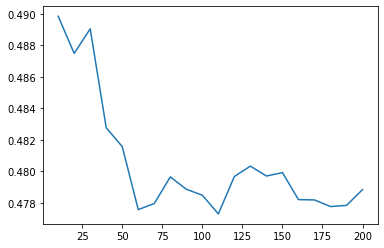

In [208]:
plt.plot(range(10, 201, 10), aucs)

In [209]:
all_aucs = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []
    
    for i in range (10, 201, 10):
        rf = RandomForestClassifier(n_estimators = i, max_depth = depth, random_state = 1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
        
    all_aucs[depth] = aucs
    print()

depth: 5
10 -> 0.473
20 -> 0.476
30 -> 0.475
40 -> 0.475
50 -> 0.475
60 -> 0.475
70 -> 0.473
80 -> 0.473
90 -> 0.473
100 -> 0.473
110 -> 0.473
120 -> 0.473
130 -> 0.474
140 -> 0.473
150 -> 0.473
160 -> 0.474
170 -> 0.474
180 -> 0.474
190 -> 0.474
200 -> 0.474

depth: 10
10 -> 0.488
20 -> 0.481
30 -> 0.479
40 -> 0.481
50 -> 0.481
60 -> 0.482
70 -> 0.482
80 -> 0.481
90 -> 0.482
100 -> 0.482
110 -> 0.484
120 -> 0.485
130 -> 0.485
140 -> 0.485
150 -> 0.484
160 -> 0.484
170 -> 0.484
180 -> 0.483
190 -> 0.483
200 -> 0.483

depth: 20
10 -> 0.493
20 -> 0.485
30 -> 0.488
40 -> 0.484
50 -> 0.481
60 -> 0.481
70 -> 0.483
80 -> 0.484
90 -> 0.483
100 -> 0.481
110 -> 0.481
120 -> 0.482
130 -> 0.483
140 -> 0.483
150 -> 0.483
160 -> 0.482
170 -> 0.482
180 -> 0.483
190 -> 0.483
200 -> 0.481



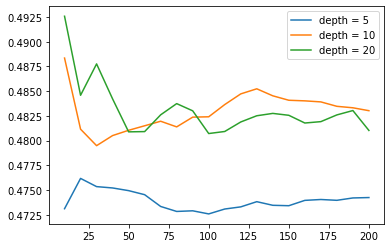

In [210]:
num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[5], label = 'depth = 5')
plt.plot(num_trees, all_aucs[10], label = 'depth = 10')
plt.plot(num_trees, all_aucs[20], label = 'depth = 20')
plt.legend()


In [211]:
all_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []
    
    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators = i, max_depth = 10, min_samples_leaf = m, random_state = 1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
        
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.482
30 -> 0.481
50 -> 0.478
70 -> 0.479
90 -> 0.479
110 -> 0.479
130 -> 0.479
150 -> 0.479
170 -> 0.478
190 -> 0.478

min_samples_leaf: 5
10 -> 0.481
30 -> 0.480
50 -> 0.479
70 -> 0.480
90 -> 0.480
110 -> 0.480
130 -> 0.480
150 -> 0.481
170 -> 0.480
190 -> 0.480

min_samples_leaf: 10
10 -> 0.481
30 -> 0.477
50 -> 0.476
70 -> 0.475
90 -> 0.475
110 -> 0.476
130 -> 0.476
150 -> 0.476
170 -> 0.476
190 -> 0.476



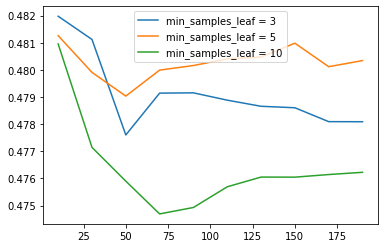

In [212]:
num_trees = list(range(10, 201, 20))
plt.plot(num_trees, all_aucs[3], label = 'min_samples_leaf = 3')
plt.plot(num_trees, all_aucs[5], label = 'min_samples_leaf = 5')
plt.plot(num_trees, all_aucs[10], label = 'min_samples_leaf = 10')
plt.legend()

In [213]:
#Gradient boosting
import xgboost as xgb

In [214]:
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names = dv.feature_names_)
dval = xgb.DMatrix(X_val, label = y_val, feature_names = dv.feature_names_)

In [215]:
#Specifying training parameters
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'object': 'binary:logistic',
    'nthread': 2,
    'seed': 1,
    'silent': 1
}

In [216]:
model = xgb.train(xgb_params, dtrain, num_boost_round = 10)

[04:31:16] WARNING: D:\bld\xgboost-split_1660208973102\work\src\learner.cc:627: 
Parameters: { "object", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [217]:
y_pred = model.predict(dval)
y_pred[:10]

array([0.09359038, 0.30647546, 0.07531515, 0.18516193, 0.322989  ,
       0.12860909, 0.5795314 , 0.6687297 , 0.22300881, 0.2360373 ],
      dtype=float32)

In [218]:
roc_auc_score(y_val, y_pred)

0.48827155229226915

In [219]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [220]:
#Parameter tuning - eta
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'object': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 2,
    'seed': 1,
    'silent': 1
}

In [221]:
model = xgb.train(xgb_params, dtrain, num_boost_round = 100, evals = watchlist, verbose_eval = 10)

[04:31:16] WARNING: D:\bld\xgboost-split_1660208973102\work\src\learner.cc:627: 
Parameters: { "object", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.88140	val-auc:0.48787
[10]	train-auc:0.97873	val-auc:0.48840
[20]	train-auc:0.98919	val-auc:0.48440
[30]	train-auc:0.99719	val-auc:0.48833
[40]	train-auc:0.99923	val-auc:0.49209
[50]	train-auc:0.99989	val-auc:0.49245
[60]	train-auc:0.99996	val-auc:0.49059
[70]	train-auc:1.00000	val-auc:0.49110
[80]	train-auc:1.00000	val-auc:0.48756
[90]	train-auc:1.00000	val-auc:0.48880
[99]	train-auc:1.00000	val-auc:0.48847


In [222]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'object': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 2,
    'seed': 1,
    'silent': 1
}

In [233]:
model = xgb.train(xgb_params, dtrain, num_boost_round = 500, evals = watchlist, verbose_eval = 10)

[04:36:26] WARNING: D:\bld\xgboost-split_1660208973102\work\src\learner.cc:627: 
Parameters: { "object", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.78005	val-auc:0.48782
[10]	train-auc:0.84289	val-auc:0.47366
[20]	train-auc:0.86542	val-auc:0.47591
[30]	train-auc:0.88387	val-auc:0.47620
[40]	train-auc:0.89502	val-auc:0.47629
[50]	train-auc:0.90266	val-auc:0.47658
[60]	train-auc:0.90932	val-auc:0.47724
[70]	train-auc:0.91529	val-auc:0.47857
[80]	train-auc:0.91870	val-auc:0.47883
[90]	train-auc:0.92225	val-auc:0.47871
[100]	train-auc:0.92455	val-auc:0.47859
[110]	train-auc:0.92718	val-auc:0.47880
[120]	train-auc:0.92915	val-auc:0.47850
[130]	train-auc:0.93273	val-auc:0.47803
[140]	train-auc:0.93615	val-auc:0.47833
[150]	t

In [237]:
#Max depth
xgb_params = {
    'eta': 0.3,
    'max_depth': 3,
    'min_child_weight': 1,
    
    'object': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 2,
    'seed': 1,
    'silent': 1
}


model = xgb.train(xgb_params, dtrain, num_boost_round = 500, evals = watchlist, verbose_eval = 10)

[04:46:27] WARNING: D:\bld\xgboost-split_1660208973102\work\src\learner.cc:627: 
Parameters: { "object", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.78005	val-auc:0.48782
[10]	train-auc:0.88247	val-auc:0.48051
[20]	train-auc:0.90702	val-auc:0.48046
[30]	train-auc:0.92102	val-auc:0.48086
[40]	train-auc:0.93025	val-auc:0.48162
[50]	train-auc:0.93820	val-auc:0.48323
[60]	train-auc:0.94521	val-auc:0.48689
[70]	train-auc:0.95375	val-auc:0.48558
[80]	train-auc:0.95960	val-auc:0.48479
[90]	train-auc:0.96718	val-auc:0.48715
[100]	train-auc:0.97172	val-auc:0.48699
[110]	train-auc:0.97503	val-auc:0.48990
[120]	train-auc:0.97798	val-auc:0.48949
[130]	train-auc:0.98039	val-auc:0.49049
[140]	train-auc:0.98400	val-auc:0.49098
[150]	t

In [238]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 4,
    'min_child_weight': 1,
    
    'object': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 2,
    'seed': 1,
    'silent': 1
}


model = xgb.train(xgb_params, dtrain, num_boost_round = 500, evals = watchlist, verbose_eval = 10)

[04:46:43] WARNING: D:\bld\xgboost-split_1660208973102\work\src\learner.cc:627: 
Parameters: { "object", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.81546	val-auc:0.48284
[10]	train-auc:0.91878	val-auc:0.47591
[20]	train-auc:0.94217	val-auc:0.47731
[30]	train-auc:0.95355	val-auc:0.48121
[40]	train-auc:0.96482	val-auc:0.48464
[50]	train-auc:0.97312	val-auc:0.48237
[60]	train-auc:0.98232	val-auc:0.48534
[70]	train-auc:0.98787	val-auc:0.48731
[80]	train-auc:0.99349	val-auc:0.48485
[90]	train-auc:0.99607	val-auc:0.48773
[100]	train-auc:0.99721	val-auc:0.48849
[110]	train-auc:0.99789	val-auc:0.48855
[120]	train-auc:0.99869	val-auc:0.48929
[130]	train-auc:0.99896	val-auc:0.48888
[140]	train-auc:0.99943	val-auc:0.48753
[150]	t

In [239]:
#minimum child weight
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 5,
    
    'object': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 2,
    'seed': 1,
    'silent': 1
}


model = xgb.train(xgb_params, dtrain, num_boost_round = 500, evals = watchlist, verbose_eval = 10)

[04:47:16] WARNING: D:\bld\xgboost-split_1660208973102\work\src\learner.cc:627: 
Parameters: { "object", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.87659	val-auc:0.48770
[10]	train-auc:0.96955	val-auc:0.48523
[20]	train-auc:0.98769	val-auc:0.49074
[30]	train-auc:0.99380	val-auc:0.48699
[40]	train-auc:0.99785	val-auc:0.49368
[50]	train-auc:0.99921	val-auc:0.49152
[60]	train-auc:0.99981	val-auc:0.49286
[70]	train-auc:0.99997	val-auc:0.49699
[80]	train-auc:0.99999	val-auc:0.49640
[90]	train-auc:1.00000	val-auc:0.49944
[100]	train-auc:1.00000	val-auc:0.50210
[110]	train-auc:1.00000	val-auc:0.50174
[120]	train-auc:1.00000	val-auc:0.50169
[130]	train-auc:1.00000	val-auc:0.50076
[140]	train-auc:1.00000	val-auc:0.49928
[150]	t

In [240]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'object': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 2,
    'seed': 1,
    'silent': 1
}


model = xgb.train(xgb_params, dtrain, num_boost_round = 500, evals = watchlist, verbose_eval = 10)

[04:48:30] WARNING: D:\bld\xgboost-split_1660208973102\work\src\learner.cc:627: 
Parameters: { "object", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.88140	val-auc:0.48787
[10]	train-auc:0.97873	val-auc:0.48840
[20]	train-auc:0.98919	val-auc:0.48440
[30]	train-auc:0.99719	val-auc:0.48833
[40]	train-auc:0.99923	val-auc:0.49209
[50]	train-auc:0.99989	val-auc:0.49245
[60]	train-auc:0.99996	val-auc:0.49059
[70]	train-auc:1.00000	val-auc:0.49110
[80]	train-auc:1.00000	val-auc:0.48756
[90]	train-auc:1.00000	val-auc:0.48880
[100]	train-auc:1.00000	val-auc:0.48919
[110]	train-auc:1.00000	val-auc:0.48839
[120]	train-auc:1.00000	val-auc:0.49109
[130]	train-auc:1.00000	val-auc:0.49400
[140]	train-auc:1.00000	val-auc:0.49599
[150]	t

In [225]:
y_train = (df_train_full.status == 'default').values
y_test = (df_test.status == 'default').values

del df_train_full['status']
del df_test ['status']

In [226]:
dict_train = df_train_full.fillna(0).to_dict(orient = 'records')
dict_test = df_test.fillna(0).to_dict(orient = 'records')

dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)

In [244]:
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names = dv.feature_names_)
dtest = xgb.DMatrix(X_test, label = y_test, feature_names = dv.feature_names_)

In [249]:
#Final test
xgb_params = {
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 5,
    
    'object': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 2,
    'seed': 1,
    'silent': 1
}

num_trees = 160

model = xgb.train(xgb_params, dtrain, num_boost_round = num_trees)

[05:01:03] WARNING: D:\bld\xgboost-split_1660208973102\work\src\learner.cc:627: 
Parameters: { "object", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [250]:
y_pred_xgb = model.predict(dtest)
roc_auc_score(y_test, y_pred_xgb)

0.8203977376391168